In [1]:
#import packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline


In [2]:
#import data here 

train_data = pd.read_csv('./train_noclean2.csv')
test_data = pd.read_csv('./test_noclean2.csv')


In [3]:

y_train = train_data.loc[:,'price']
train_data = train_data.drop(columns='price')
num_features = len(train_data.columns)
features = list(train_data.columns[2:num_features])
X_train = train_data.loc[:,features]

features = list(test_data.columns[2:num_features])

X_test = test_data.loc[:,features]
test_labels = test_data.loc[:,'id']
print(X_train.head(5))
print(X_train.shape)
print(X_test.shape)
print(y_train)
test_labels = test_labels.to_frame()

   minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0               1                170          205               2.48   
1               1                 11          197               0.57   
2               3                  2         1911               0.08   
3               2                  1         1911               0.13   
4               2                 31         1912               1.54   

   calculated_host_listings_count  availability_365  host_since  \
0                               4               346          13   
1                               1                 0          14   
2                              19               360          17   
3                               1               267          19   
4                               5               365          15   

   host_is_superhost  bathrooms  bedrooms  ...  Da_hood_1  Da_hood_2  \
0              False        1.0         0  ...          1          0   
1              False

In [4]:
print(X_train.nunique())
print(X_train['host_since'].value_counts())

minimum_nights                         48
number_of_reviews                     248
last_review                            82
reviews_per_month                     504
calculated_host_listings_count         47
availability_365                      361
host_since                             13
host_is_superhost                       2
bathrooms                              18
bedrooms                               13
beds                                   18
bed_type                                2
cleaning_fee                          589
guests_included                        14
extra_people                          348
maximum_nights                        168
instant_bookable                        1
Da_hood_1                               2
Da_hood_2                               2
Da_hood_3                               2
Da_hood_15                              2
Cancel_flexible                         2
Cancel_moderate                         2
Cancel_strict_14_with_grace_period

In [5]:

dtest = xgb.DMatrix(X_test)

In [6]:
def run_model(X_train, y_train, dtest, max_depth, n, eta, gamma):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    param = {'max_depth':max_depth, 'objective':'multi:softmax', 'eta':eta, 'gamma':gamma, 'num_class':5}
    num_round = n
    bst = xgb.train(param, dtrain, num_round)
    return bst

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

list_max_depth = list(np.arange(1, 10))

kf = KFold(n_splits = 10, shuffle=True)
kf_accuracy = []
depth_average = []
depth_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for max_depth in list_max_depth: 
    print(max_depth)
    i=0
    accuracy_depth = []
    for train, test in kf.split(X_train):
        i+=1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, max_depth, 300, 0.1, 1)
        #X_train, y_train, dtest, 9, 300, 0.1, 1
        ypred_test_kf = bst.predict(dtest_kf)
        
        accuracy_depth.append(accuracy_score(y_test_kf, ypred_test_kf))
    depth_average.append(np.mean(accuracy_depth))
    depth_std.append(np.std(accuracy_depth))
    print(np.mean(accuracy_depth))
    print(np.std(accuracy_depth))
    
    

1
1
2
3
4
5
6
7
8
9
10
0.5110044648568431
0.018087323742785832
2
1
2
3
4
5
6
7
8
9
10
0.5340392028929883
0.013133487106593063
3
1
2
3
4
5
6
7
8
9
10
0.5368249409376625
0.014270320043790486
4
1
2
3
4
5
6
7
8
9
10
0.5431254211123335
0.013198802167813524
5
1
2
3
4
5
6
7
8
9
10
0.5444686095403799
0.017765216191198092
6
1
2
3
4
5
6
7
8
9
10
0.548394335985808
0.020038353135685055
7
1
2
3
4
5
6
7
8
9
10
0.547774181442912
0.018680324492046003
8
1
2
3
4
5
6
7
8
9
10
0.5437454690445123
0.007975404478548958
9
1
2
3
4
5
6
7
8
9
10
0.5482926293614445
0.012050668579401878


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

list_max_depth = [10,15,20,30]

kf = KFold(n_splits = 5, shuffle=True)
kf_accuracy = []
depth_average = []
depth_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for max_depth in list_max_depth: 
    print(max_depth)
    i=0
    accuracy_depth = []
    for train, test in kf.split(X_train):
        i+=1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, max_depth, 500, 0.05, 3)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        accuracy_depth.append(accuracy_score(y_test_kf, ypred_test_kf))
    depth_average.append(np.mean(accuracy_depth))
    depth_std.append(np.std(accuracy_depth))
    print(np.mean(accuracy_depth))
    print(np.std(accuracy_depth))
    
    

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

eta_list = [0.01,0.03,0.05,0.08,0.1,0.15,0.2,0.3]

kf = KFold(n_splits = 5, shuffle=True)
kf_accuracy = []
eta_average = []
eta_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for eta in eta_list: 
    eta_acc = []
    print(eta)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 6, 500, eta, 3)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        eta_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    eta_average.append(np.mean(eta_acc))
    eta_std.append(np.std(eta_acc))
    print(np.mean(eta_acc))
    print(np.std(eta_acc))
    
    

0.01
1
2
3
4
5
0.5342423744650712
0.0037946776976774325
0.03
1
2
3
4
5
0.5387880423420387
0.00673100577829454
0.05
1
2
3
4
5
0.5374466671217739
0.011804316163591724
0.08
1
2
3
4
5
0.5348628491703538
0.008107279696893645
0.1
1
2
3
4
5
0.537754771159286
0.0063962672028789625
0.15
1
2
3
4
5
0.539098066363167
0.01085398248586026
0.2
1
2
3
4
5
0.5330037183682699
0.0063934341993735905
0.3
1
2
3
4
5
0.5385806307786174
0.00641269805835339


In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

gamma_list = [0.1, 0.5, 1, 2, 3, 5, 10, 20]

kf = KFold(n_splits = 5, shuffle=True)
kf_accuracy = []
gamma_average = []
gamma_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for gamma in gamma_list: 
    gamma_acc = []
    print(gamma)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 6, 500, 0.15, gamma)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        gamma_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    gamma_average.append(np.mean(gamma_acc))
    gamma_std.append(np.std(gamma_acc))
    
    
    

0.1
1
2
3
4
5
0.5
1
2
3
4
5
1
1
2
3
4
5
2
1
2
3
4
5
3
1
2
3
4
5
5
1
2
3
4
5
10
1
2
3
4
5
20
1
2
3
4
5


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

num_list = [50, 100, 150, 200, 300, 500, 1000]

kf = KFold(n_splits = 5, shuffle=True)
kf_accuracy = []
num_average = []
num_std = []
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)

for num in num_list: 
    num_acc = []
    print(num)
    i = 0
    for train, test in kf.split(X_train):
        i += 1
        print(i)
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]
        dtest_kf = xgb.DMatrix(X_test_kf, label=y_test_kf)
        bst = run_model(X_train_kf, y_train_kf, dtest_kf, 6, num, 0.15, 0.5)
        
        ypred_test_kf = bst.predict(dtest_kf)
        
        num_acc.append(accuracy_score(y_test_kf, ypred_test_kf))
    num_average.append(np.mean(num_acc))
    num_std.append(np.std(num_acc))
    print(np.mean(num_acc))
    print(np.std(num_acc))
    
    

50
1
2
3
4
5
0.5400254717826408
0.008481850887549519
100
1
2
3
4
5
0.5424031581597171
0.006746270213355935
150
1
2
3
4
5
0.5445726329801985
0.01823997219147742
200
1
2
3
4
5
0.5427108888670816
0.01111724151269128
300
1
2
3
4
5
0.5432299777708564
0.00532817444535665
500
1
2
3
4
5
0.5395109161735154
0.009568167016414622
1000
1
2
3
4
5


In [ ]:
print(num_average)
print(num_std)

In [12]:
print(gamma_average)
print(gamma_std)

[0.5385796707868094, 0.5471528776287776, 0.5424027848295695, 0.5472577834002483, 0.5359978794847617, 0.5304210737401707, 0.5191604231643889, 0.49705506513011083]
[0.009008566400556766, 0.008057757232183735, 0.005089394761086707, 0.0036263727018859045, 0.0072575091340615055, 0.014293571159982687, 0.0070079319988740054, 0.007057881211073362]


In [ ]:
print(eta_average)
print(eta_std)

In [ ]:
print(depth_average)
print(depth_std)

In [8]:
bst = run_model(X_train, y_train, dtest, 6, 150, 0.15, 0.5)

In [9]:
dtrain = xgb.DMatrix(X_train, label=y_train)
ypred_train = bst.predict(dtrain)
print(ypred_train)

[3. 1. 3. ... 3. 3. 1.]


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, ypred_train)

0.8992872637124264

In [11]:
ypred_test = bst.predict(dtest)

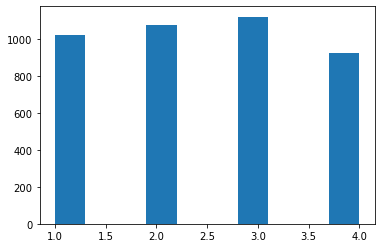

In [12]:
plt.figure()
plt.hist(ypred_test)
plt.show()


In [13]:
df = pd.DataFrame
test_labels['price'] = ypred_test
test_labels['price'] = test_labels['price'].map(lambda x: int(x))

In [14]:
test_labels

,id,price
0,7715,2
1,13196,3
2,13194,2
3,4673,2
4,11325,2
...,...,...
4144,12921,4
4145,7174,1
4146,9240,3
4147,11663,1


In [15]:
test_labels.to_csv(r'./submission3.csv', index=False)